In [2]:
import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
import sympy
from sklearn.preprocessing import MinMaxScaler
from scipy import interpolate

# Caso 1: Senoide

In [17]:
# Variáveis dadas pelo problema

v = 60/3.6
y0 = 50e-3
min_mass = 1
max_mass = 2
min_lambda = 300e-3
max_lambda = 500e-3

# Variáveis em estudo

min_zeta = 0.02
max_zeta = 0.98
min_tau = 0.001
max_tau = 15
min_omega_n = 0.00001
max_omega_n = 3.5
min_Omega = 5
max_Omega = 8

# Definiçao dos Intervalos de valores em estudo

csi_eval = np.linspace(min_zeta,max_zeta,num=100) 
tau_eval = np.linspace(min_tau,max_tau,num=100) 
omega_n_eval = np.linspace(min_omega_n,max_omega_n,num=100) 
lamb = np.linspace(min_lambda,max_lambda,num=100)
Omega = np.linspace(min_Omega,max_Omega,num=100)
omega_eval = 2*np.pi*v/lamb
mass_eval = np.linspace(min_mass,max_mass,num=100) 

# Definição das listas de valores em estudo 

# zeta

delta_zeta = max_zeta - min_zeta
passo_zeta = delta_zeta/5

zeta_list = [min_zeta + i*passo_zeta for i in range (0,5)]

# omega natural 

delta_omega_n = max_omega_n - min_omega_n
passo_omega_n = delta_omega_n/5

omega_n_list = [min_omega_n + i*passo_omega_n for i in range (0,5)]

# omega

delta_omega = max(omega_eval) - min(omega_eval)
passo_omega = delta_omega/5

omega_list = [min(omega_eval) + i*passo_omega for i in range (0,5)]

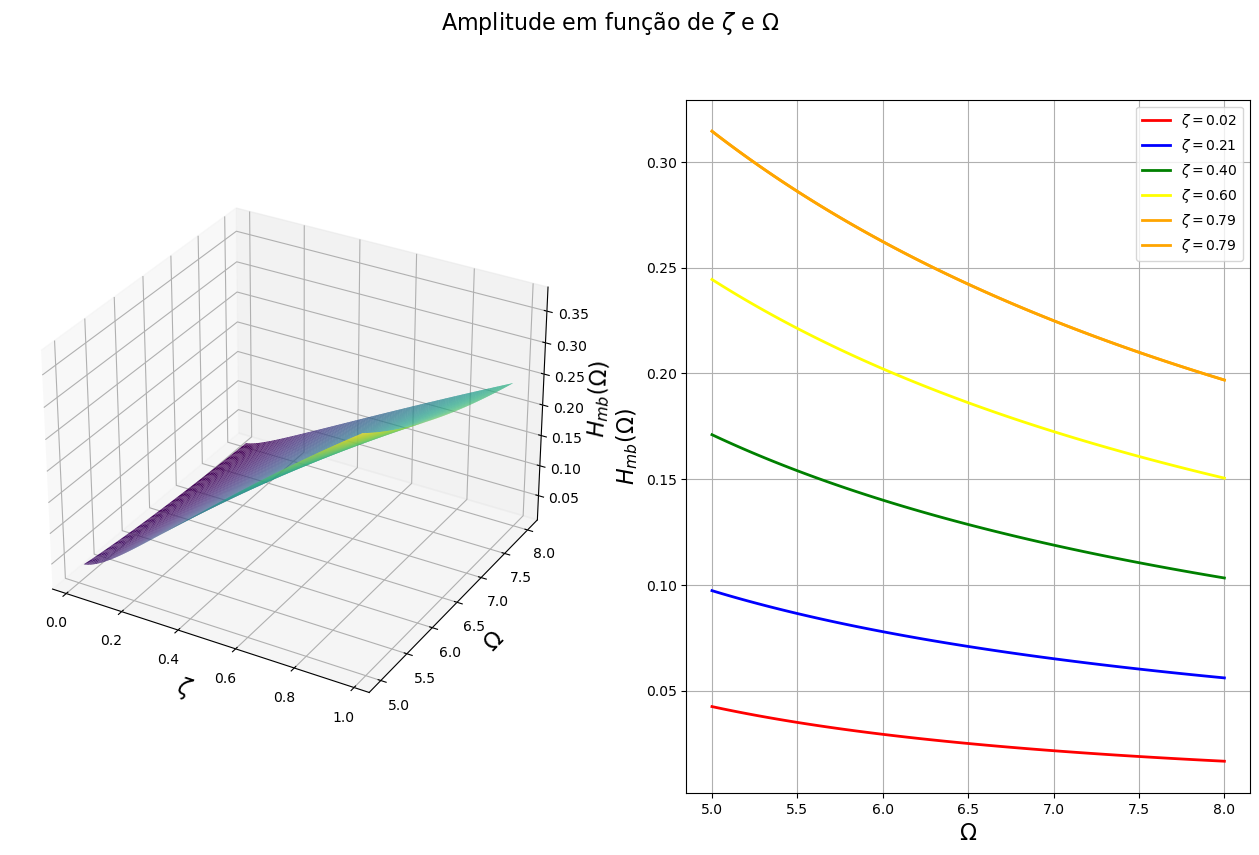

In [18]:
fig = plt.figure(figsize=[16,9])
fig.suptitle('Amplitude em função de $\zeta$ e $\Omega$', fontsize=16)

# Plotango 3D
ax = fig.add_subplot(1, 2, 1, projection='3d')

X, Y = np.meshgrid(csi_eval, Omega)

Hmb = (1+(2*X*Y)**2)**0.5/((1-Y**2)**2 + (2*X*Y)**2)**0.5
    
ax.set_ylabel('$\Omega$',fontsize=16)
ax.set_xlabel('$\zeta$',fontsize=16)
ax.set_zlabel('$H_{mb}(\Omega )$',fontsize=16)

ax.plot_surface(X, Y, Hmb, rstride=1, cstride=1,
                    cmap='viridis', edgecolor='none')

ax.grid()

# Plotando 2D

ax = fig.add_subplot(1, 2, 2)

Hmb = [(1+(2*zeta*Omega)**2)**0.5/((1-Omega**2)**2 + (2*zeta*Omega)**2)**0.5 for zeta in zeta_list]

ax.set_ylabel('$H_{mb}(\Omega )$',fontsize=16)
ax.set_xlabel('$\Omega$',fontsize=16)

ax.plot(Omega,Hmb[0],'r', linewidth=2, label = '$\zeta = ${:.2f}'.format(zeta_list[0]))
ax.plot(Omega,Hmb[1],'b', linewidth=2, label = '$\zeta = ${:.2f}'.format(zeta_list[1]))
ax.plot(Omega,Hmb[2],'g', linewidth=2, label = '$\zeta = ${:.2f}'.format(zeta_list[2]))
ax.plot(Omega,Hmb[3],'yellow', linewidth=2, label = '$\zeta = ${:.2f}'.format(zeta_list[3]))
ax.plot(Omega,Hmb[4],'orange', linewidth=2, label = '$\zeta = ${:.2f}'.format(zeta_list[4]))
ax.plot(Omega,Hmb[4],'orange', linewidth=2, label = '$\zeta = ${:.2f}'.format(zeta_list[4]))

ax.grid()
ax.legend()

plt.show()
fig.savefig('Amplitude__Caso_1__seno__.png', bbox_inches='tight')

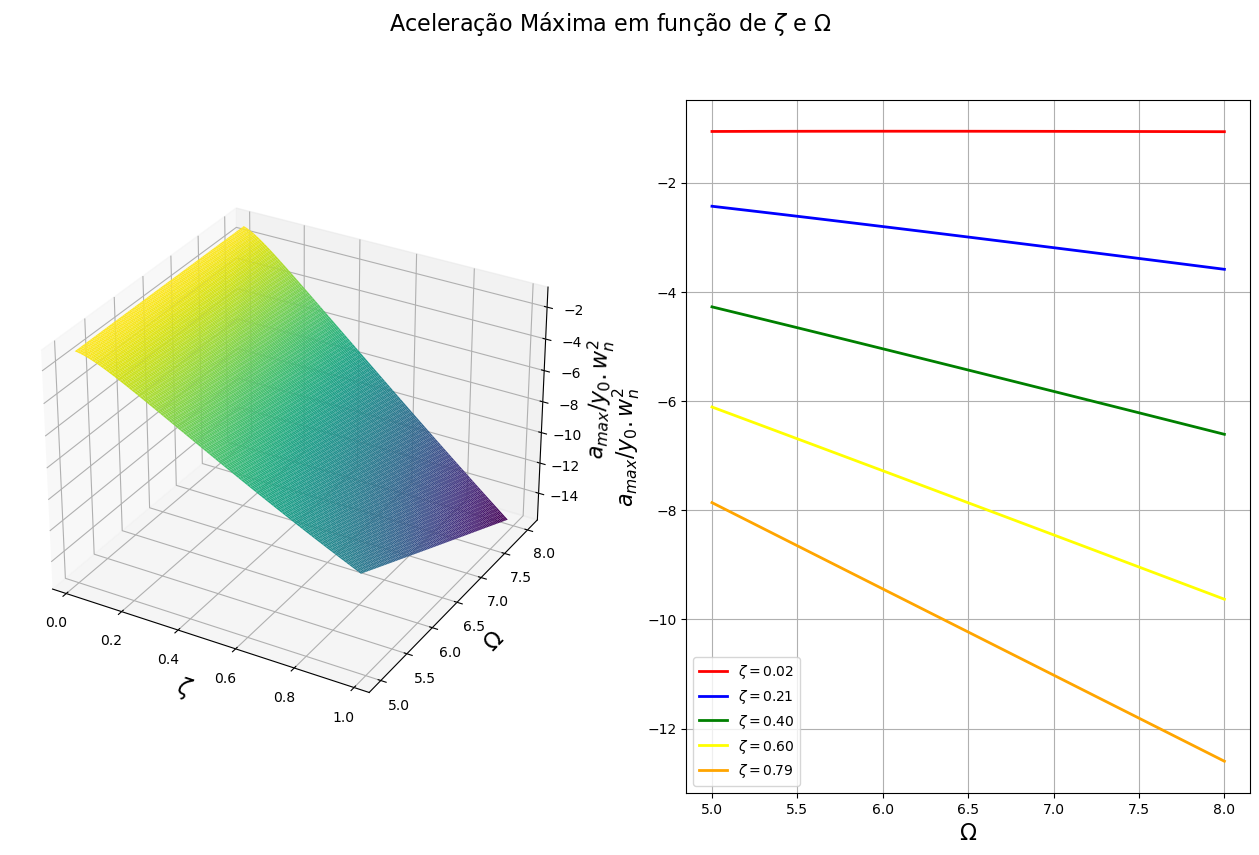

In [19]:
fig = plt.figure(figsize=[16,9])
fig.suptitle('Aceleração Máxima em função de $\zeta$ e $\Omega$',fontsize=16)

# Plotango 3D

ax = fig.add_subplot(1, 2, 1, projection='3d')

X, Y = np.meshgrid(csi_eval, Omega)

Hmb = (1+(2*X*Y)**2)**0.5/((1-Y**2)**2 + (2*X*Y)**2)**0.5

Z = -Y**2 * Hmb

ax.set_ylabel('$\Omega$',fontsize=16)
ax.set_xlabel('$\zeta$',fontsize=16)
ax.set_zlabel('$a_{max}/y_0.w_n^2$',fontsize=16)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                        cmap='viridis', edgecolor='none')

ax.grid()

# Plotando 2D

ax = fig.add_subplot(1, 2, 2)

A = [(1+(2*zeta*Omega)**2)**0.5/((1-Omega**2)**2 + (2*zeta*Omega)**2)**0.5 for zeta in zeta_list]
    
Z = - Omega**2 * A

ax.set_ylabel('$a_{max}/y_0.w_n^2$',fontsize=16)
ax.set_xlabel('$\Omega$',fontsize=16)

ax.plot(Omega,Z[0],'r', linewidth=2, label = '$\zeta = ${:.2f}'.format(zeta_list[0]))
ax.plot(Omega,Z[1],'b', linewidth=2, label = '$\zeta = ${:.2f}'.format(zeta_list[1]))
ax.plot(Omega,Z[2],'g', linewidth=2, label = '$\zeta = ${:.2f}'.format(zeta_list[2]))
ax.plot(Omega,Z[3],'yellow', linewidth=2, label = '$\zeta = ${:.2f}'.format(zeta_list[3]))
ax.plot(Omega,Z[4],'orange', linewidth=2, label = '$\zeta = ${:.2f}'.format(zeta_list[4]))


ax.grid()
ax.legend()

plt.show()
fig.savefig('Aceleracao_max__Caso_1__seno__.png', bbox_inches='tight')

# Caso 1: Degrau

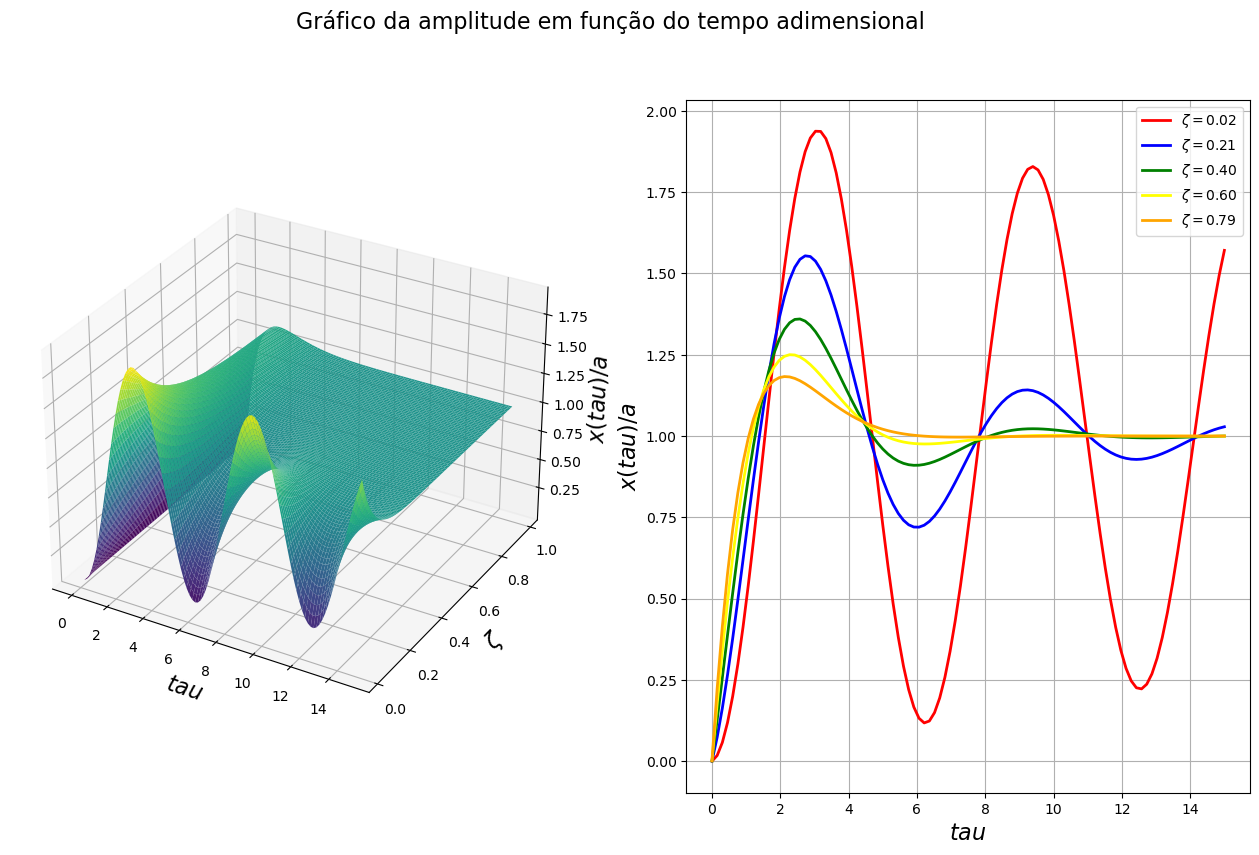

In [20]:
fig = plt.figure(figsize=[16,9])
fig.suptitle('Gráfico da amplitude em função do tempo adimensional', fontsize=16)

# Plotango 3D

ax = fig.add_subplot(1, 2, 1, projection='3d')

X, Y = np.meshgrid(tau_eval, csi_eval)

Z = (2*Y*np.exp(-Y*X)*np.sin((1-Y**2)**0.5*X)/(1-Y**2)**0.5 + 
       1 - np.exp(-Y*X)*np.sin((1-Y**2)**0.5*X + 
        np.arctan((1-Y**2)**0.5/Y))/(1-Y**2)**0.5)
    
ax.set_ylabel('$\zeta$',fontsize=16)
ax.set_xlabel('$tau$',fontsize=16)
ax.set_zlabel('$x(tau)/a$',fontsize=16)
    
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                    cmap='viridis', edgecolor='none')

ax.grid()

# Plotando 2D

ax = fig.add_subplot(1, 2, 2)

Hmb = []
HbmI = []

for zeta,i in zip(zeta_list,range(len(zeta_list))):

    Hmb.append(2*zeta*np.exp(-zeta*tau_eval)*np.sin((1-zeta**2)**0.5*tau_eval)/(1-zeta**2)**0.5 + 
           1 - np.exp(-zeta*tau_eval)*np.sin((1-zeta**2)**0.5*tau_eval + 
            np.arctan((1-zeta**2)**0.5/zeta))/(1-zeta**2)**0.5)

    tck = interpolate.splrep(tau_eval, Hmb[i])
    
    HbmI.append(interpolate.splev(tau_eval, tck, der=2))


ax.set_ylabel('$x(tau )/a$',fontsize=16)
ax.set_xlabel('$tau $',fontsize=16)

ax.plot(tau_eval,Hmb[0],'r', linewidth=2, label = '$\zeta = ${:.2f}'.format(zeta_list[0]))
ax.plot(tau_eval,Hmb[1],'b', linewidth=2, label = '$\zeta = ${:.2f}'.format(zeta_list[1]))
ax.plot(tau_eval,Hmb[2],'g', linewidth=2, label = '$\zeta = ${:.2f}'.format(zeta_list[2]))
ax.plot(tau_eval,Hmb[3],'yellow', linewidth=2, label = '$\zeta = ${:.2f}'.format(zeta_list[3]))
ax.plot(tau_eval,Hmb[4],'orange', linewidth=2, label = '$\zeta = ${:.2f}'.format(zeta_list[4]))

ax.grid()
ax.legend()

plt.show()
fig.savefig('Amplitude_max__Caso_1__degrau__.png', bbox_inches='tight')

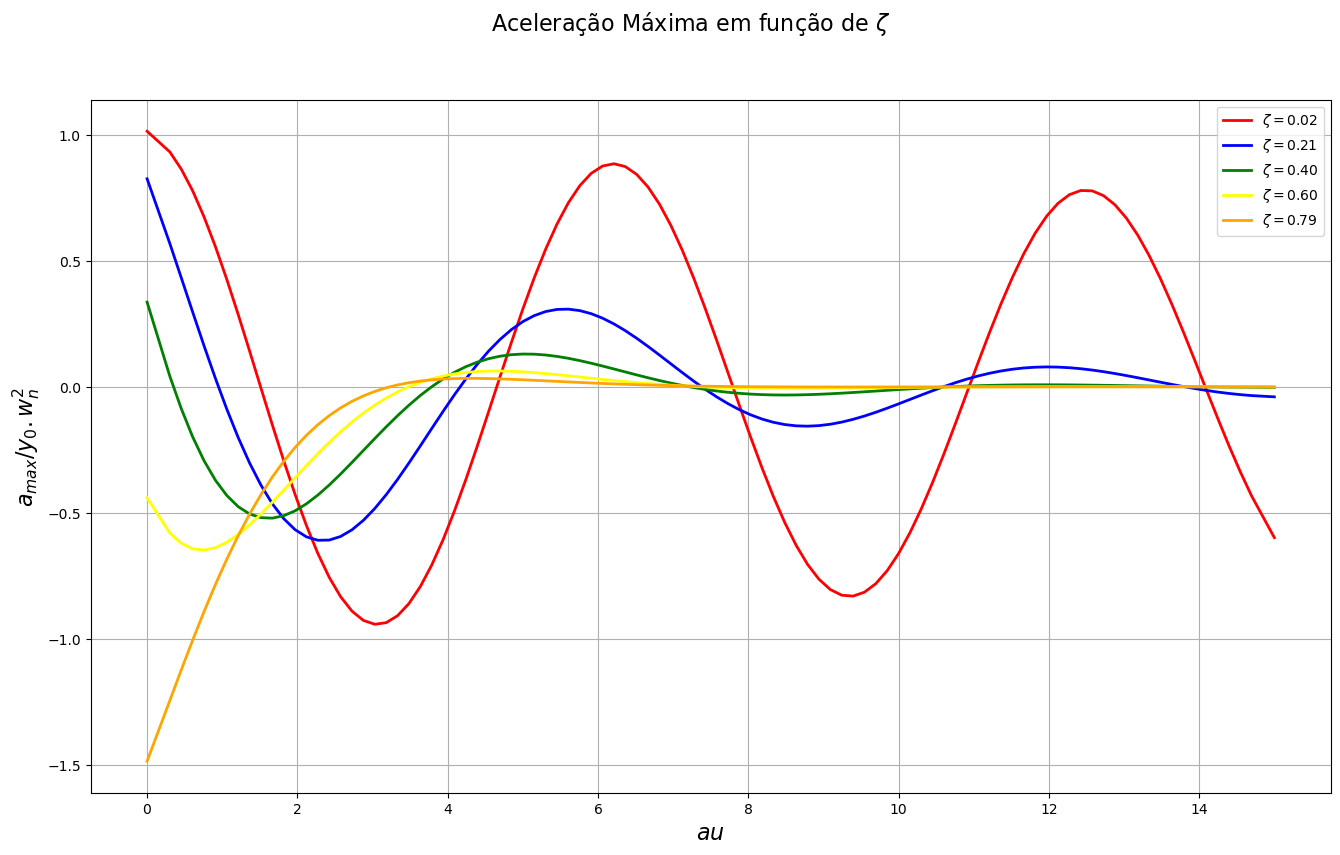

In [23]:
fig = plt.figure(figsize=[16,9])
fig.suptitle('Aceleração Máxima em função de $\zeta$',fontsize=16)

# Plotando 2D

ax = fig.add_subplot(1, 1, 1)

ax.set_ylabel('$a_{max}/y_0.w_n^2$',fontsize=16)
ax.set_xlabel('$\tau$',fontsize=16)

ax.plot(tau_eval,HbmI[0],'r', linewidth=2, label = '$\zeta = ${:.2f}'.format(zeta_list[0]))
ax.plot(tau_eval,HbmI[1],'b', linewidth=2, label = '$\zeta = ${:.2f}'.format(zeta_list[1]))
ax.plot(tau_eval,HbmI[2],'g', linewidth=2, label = '$\zeta = ${:.2f}'.format(zeta_list[2]))
ax.plot(tau_eval,HbmI[3],'yellow', linewidth=2, label = '$\zeta = ${:.2f}'.format(zeta_list[3]))
ax.plot(tau_eval,HbmI[4],'orange', linewidth=2, label = '$\zeta = ${:.2f}'.format(zeta_list[4]))

ax.grid()
ax.legend()

plt.show()
fig.savefig('Aceleracao__Caso_1__degrau__.png', bbox_inches='tight')

# Analise paramétrica

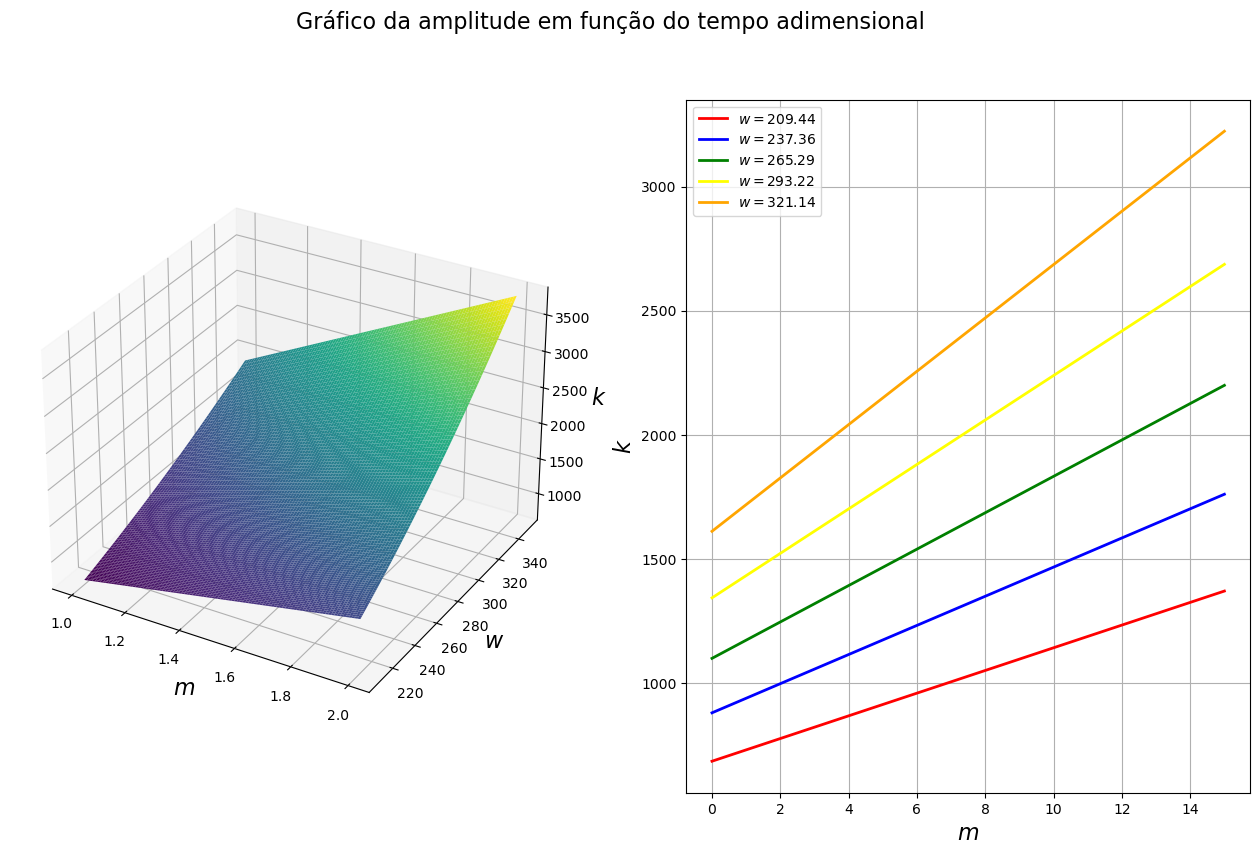

In [22]:
Omega_top = 8

fig = plt.figure(figsize=[16,9])
fig.suptitle('Gráfico da amplitude em função do tempo adimensional', fontsize=16)

# Plotango 3D

ax = fig.add_subplot(1, 2, 1, projection='3d')

X, Y = np.meshgrid(mass_eval, omega_eval)

Z = X*(Y/Omega_top)**2
    
ax.set_ylabel('$w$',fontsize=16)
ax.set_xlabel('$m$',fontsize=16)
ax.set_zlabel('$k$',fontsize=16)
    
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                    cmap='viridis', edgecolor='none')

ax.grid()

# Plotando 2D

ax = fig.add_subplot(1, 2, 2)

k = [mass_eval*(omega/Omega_top)**2 for omega in omega_list]

ax.set_ylabel('$k$',fontsize=16)
ax.set_xlabel('$m$',fontsize=16)

ax.plot(tau_eval,k[0],'r', linewidth=2, label = '$w = ${:.2f}'.format(omega_list[0]))
ax.plot(tau_eval,k[1],'b', linewidth=2, label = '$w = ${:.2f}'.format(omega_list[1]))
ax.plot(tau_eval,k[2],'g', linewidth=2, label = '$w = ${:.2f}'.format(omega_list[2]))
ax.plot(tau_eval,k[3],'yellow', linewidth=2, label = '$w = ${:.2f}'.format(omega_list[3]))
ax.plot(tau_eval,k[4],'orange', linewidth=2, label = '$w = ${:.2f}'.format(omega_list[4]))

ax.grid()
ax.legend()

plt.show()
fig.savefig('k__Caso_1__degrau__.png', bbox_inches='tight')